In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import LSTM, Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

# plt.style.use('fivethirtyeight')

In [2]:
AMZN = pd.read_csv('FullData\AMZN.csv')

AMZN


,Date,AMZN
0,2000-02-01,3.371875
1,2000-02-02,3.471875
2,2000-02-03,4.209375
3,2000-02-04,3.928125
4,2000-02-07,3.750000
...,...,...
5755,2022-02-22,150.197495
5756,2022-02-23,144.826996
5757,2022-02-24,151.358002
5758,2022-02-25,153.788498


In [4]:
AMZN.head()

,Date,AMZN
0,2000-02-01,3.371875
1,2000-02-02,3.471875
2,2000-02-03,4.209375
3,2000-02-04,3.928125
4,2000-02-07,3.750000


In [5]:
AMZN.tail()

,Date,AMZN
5755,2022-02-22,150.197495
5756,2022-02-23,144.826996
5757,2022-02-24,151.358002
5758,2022-02-25,153.788498
5759,2022-02-28,153.563004


In [6]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5760 non-null   object 
 1   AMZN    5555 non-null   float64
dtypes: float64(1), object(1)
memory usage: 90.1+ KB


In [7]:
AMZN.shape

(5760, 2)

In [8]:
# Convert the Date column to Datetime format
AMZN['Date'] = pd.to_datetime(AMZN['Date'])

AMZN = AMZN.set_index('Date')  # set the Date column as the index

AMZN = AMZN.sort_index()


In [9]:
AMZN = AMZN.dropna()
AMZN

,AMZN
Date,
2000-02-01,3.371875
2000-02-02,3.471875
2000-02-03,4.209375
2000-02-04,3.928125
2000-02-07,3.750000
...,...
2022-02-22,150.197495
2022-02-23,144.826996
2022-02-24,151.358002


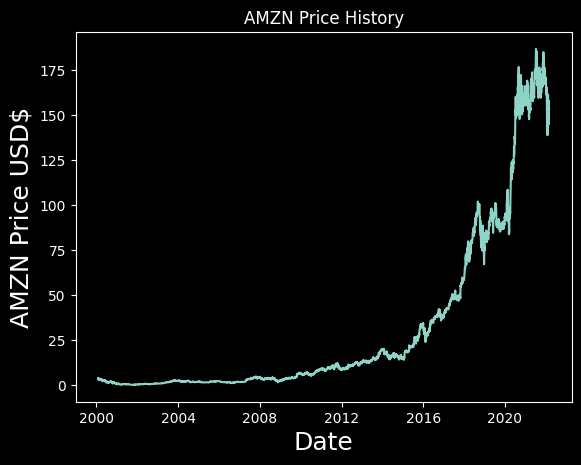

In [11]:
#Visualize the closind price history
plt.Figure(figsize=(15,20))
plt.title('AMZN Price History')
plt.plot(AMZN['AMZN'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('AMZN Price USD$', fontsize=18)
plt.show()

In [12]:
AMZN.shape

(5555, 1)

In [14]:
import math

# print(AMZN['AMZN'])
data = AMZN.filter(['AMZN'])
dataset = data.values

training_data_len = math.ceil(len(dataset)*.8)

print(training_data_len)
print(dataset)

4444
[[  3.37187505]
 [  3.47187495]
 [  4.2093749 ]
 ...
 [151.35800171]
 [153.78849792]
 [153.56300354]]


In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01649939],
       [0.01703624],
       [0.02099551],
       ...,
       [0.81096195],
       [0.82401006],
       [0.82279949]])

In [16]:
train_data = scaled_data[0:training_data_len,:]
print(training_data_len)
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

    if i<= 60:
        print(X_train)
        print(y_train)

4444
[array([0.01649939, 0.01703624, 0.02099551, 0.01948562, 0.01852936,
       0.02071031, 0.01993858, 0.01884811, 0.01884811, 0.01837837,
       0.0182106 , 0.01737177, 0.01691881, 0.015778  , 0.01545925,
       0.01730467, 0.01676782, 0.01695236, 0.01604643, 0.01688525,
       0.01607998, 0.01519082, 0.01517405, 0.01555991, 0.01544247,
       0.01547603, 0.01686848, 0.0163484 , 0.01592899, 0.01601287,
       0.01550958, 0.01618064, 0.01579478, 0.01562701, 0.01782474,
       0.01737177, 0.0165665 , 0.01790862, 0.01802606, 0.01722078,
       0.01618064, 0.01624775, 0.01638196, 0.01545925, 0.01555991,
       0.01509016, 0.01564379, 0.01653295, 0.01540892, 0.01540892,
       0.01352995, 0.01128189, 0.01097991, 0.01103024, 0.01314409,
       0.01274145, 0.01245625, 0.01176841, 0.01247302, 0.01275822])]
[0.01259045914701592]


In [17]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train.shape

(4384, 60)

In [19]:
X_train = np.reshape(X_train, (4384, 60, 1))
X_train.shape

(4384, 60, 1)

In [20]:
model = Sequential()
model.add(LSTM(units=70, return_sequences=True,input_shape=(X_train.shape[1],1),))
model.add(LSTM(units=70, return_sequences=False))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

In [21]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['MSE','MAE','accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=4, batch_size=200)
history

Epoch 1/4
22/22 [==============================] - 35s 446ms/step - loss: 0.0010 - MSE: 0.0010 - MAE: 0.0189 - accuracy: 2.2810e-04
Epoch 2/4
22/22 [==============================] - 9s 426ms/step - loss: 3.6192e-05 - MSE: 3.6192e-05 - MAE: 0.0044 - accuracy: 2.2810e-04
Epoch 3/4
22/22 [==============================] - 10s 459ms/step - loss: 1.5309e-05 - MSE: 1.5309e-05 - MAE: 0.0027 - accuracy: 2.2810e-04
Epoch 4/4
22/22 [==============================] - 10s 463ms/step - loss: 1.2266e-05 - MSE: 1.2266e-05 - MAE: 0.0022 - accuracy: 2.2810e-04


In [24]:
test_data = scaled_data[training_data_len-60:,:]
# print(scaled_data)
X_test=[]
y_test=dataset[training_data_len:,:]
for i  in  range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])
X_test

[array([0.2574649 , 0.26112084, 0.26587465, 0.26524653, 0.26856963,
        0.2669913 , 0.26730803, 0.26951716, 0.27338516, 0.27403474,
        0.27452598, 0.27371265, 0.27727731, 0.27752427, 0.280995  ,
        0.27916971, 0.2722014 , 0.26354203, 0.26579949, 0.26571895,
        0.26331119, 0.26348835, 0.26474725, 0.26409499, 0.26199321,
        0.25525845, 0.25822992, 0.26233949, 0.26218918, 0.26096516,
        0.25623819, 0.2556745 , 0.25428407, 0.25793733, 0.25554835,
        0.25405859, 0.25212862, 0.25233261, 0.25449075, 0.25812254,
        0.26161474, 0.26098394, 0.25749979, 0.2581789 , 0.26131142,
        0.25766889, 0.26090609, 0.26214623, 0.26671481, 0.26473115,
        0.26327629, 0.25989414, 0.25873186, 0.25963108, 0.25733336,
        0.25476992, 0.25066032, 0.25034091, 0.25363447, 0.25511886]),
 array([0.26112084, 0.26587465, 0.26524653, 0.26856963, 0.2669913 ,
        0.26730803, 0.26951716, 0.27338516, 0.27403474, 0.27452598,
        0.27371265, 0.27727731, 0.27752427, 0.

In [25]:
X_test=np.array(X_test)

In [26]:
X_test

array([[0.2574649 , 0.26112084, 0.26587465, ..., 0.25034091, 0.25363447,
        0.25511886],
       [0.26112084, 0.26587465, 0.26524653, ..., 0.25363447, 0.25511886,
        0.25644757],
       [0.26587465, 0.26524653, 0.26856963, ..., 0.25511886, 0.25644757,
        0.25586777],
       ...,
       [0.95441081, 0.93978163, 0.92277695, ..., 0.81763768, 0.80473178,
        0.77590029],
       [0.93978163, 0.92277695, 0.92106973, ..., 0.80473178, 0.77590029,
        0.81096195],
       [0.92277695, 0.92106973, 0.9083008 , ..., 0.77590029, 0.81096195,
        0.82401006]])

In [27]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [28]:
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)
predictions

35/35 [==============================] - 6s 56ms/step


array([[ 48.31092 ],
       [ 48.243275],
       [ 48.18829 ],
       ...,
       [135.32384 ],
       [135.06824 ],
       [134.92201 ]], dtype=float32)

In [29]:
rmse=np.sqrt(np.mean(predictions-y_test)**
2)
rmse

11.080912984029116

In [33]:
loss = model.evaluate(X_test, y_test)
loss

35/35 [==============================] - 2s 54ms/step - loss: 14854.8613 - MSE: 14854.8613 - MAE: 115.3157 - accuracy: 0.0000e+00


[14854.861328125, 14854.861328125, 115.31568908691406, 0.0]

In [34]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions

35/35 [==============================] - 2s 48ms/step


array([[ 48.31092 ],
       [ 48.243275],
       [ 48.18829 ],
       ...,
       [135.32384 ],
       [135.06824 ],
       [134.92201 ]], dtype=float32)

In [35]:
actual_prices = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions)

In [36]:
import plotly.graph_objs as go

In [37]:
AMZN.index

DatetimeIndex(['2000-02-01', '2000-02-02', '2000-02-03', '2000-02-04',
               '2000-02-07', '2000-02-08', '2000-02-09', '2000-02-10',
               '2000-02-11', '2000-02-14',
               ...
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', length=5555, freq=None)

In [38]:
time_steps=20

In [39]:
actual_trace = go.Scatter(
    x = AMZN.index[training_data_len+time_steps+1:],
    y = actual_prices.flatten(),
    mode = 'lines',
    name = 'Actual'
)

predicted_trace = go.Scatter(
    x=AMZN.index[training_data_len+time_steps+1:],
    y = predicted_prices.flatten(),
    mode = 'lines',
    name = 'Predicted'
)

# Create layout for the plot
layout = go.Layout(
    title = 'Actual vs. Predicted Apple Stock Prices (LSTM)',
    xaxis = dict(title = 'Date'),
    yaxis = dict(title = 'Price')
)

# Create figure and add traces
fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)

# Show the plot
fig.show()